## Descrição das variáveis
#### date – dia em que foi efetuado o registo.
#### all – entrada diária de todas pessoas (faces humanas) na loja.
#### female – entrada de todos elementos identificados como pertencentes ao género feminino.
#### male - igual ao atributo anterior mas relacionado com o género masculino.
#### young – entradas com estimativa de idade jovem (até 18 anos).
#### adult - entradas com estimativa de idade adulta (>18 anos).
#### weather – estado do tempo no exterior (“Sunny” ou “Rain”).
#### maxtemp, RH, maxwind – estado do tempo no exterior para o dia (temperatura máxima, humidade relativa máxima, velocidade do vento máximo).

## Importing Libraries

In [1]:
library(tidyverse)
library(rminer)
library(forecast)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'rminer' was built under R version 3.6.3"Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [51]:
data <- read.csv(file = '../data/store.csv', sep = ';')
head(data)

date,all,female,male,young,adult,weather,maxtemp,RH,maxwind
2013-04-09,2332,1115,1108,1122,1210,Rain,13,87,0
2013-04-10,2801,1217,1459,1239,1562,Rain,14,94,45
2013-04-11,2375,1168,1099,1059,1316,Rain,14,82,55
2013-04-12,3447,1617,1651,1606,1841,Sunny,13,78,0
2013-04-13,4823,2469,2117,2318,2505,Rain,16,81,37
2013-04-14,4978,2564,2223,2289,2689,Rain,16,73,0


In [28]:
cat('Head \n')
head(data)

cat('Tail \n')
tail(data)

cat('Glimpse \n')
glimpse(data)

cat('Number Columns \n')
ncol(data)

cat('Number Rows \n')
nrow(data)

cat('Column Names \n')
colnames(data)

cat('Summary \n')
summary(data)

cat('NA verification \n')
sum(is.na(data)) -> missing 
cat("There are", missing , "null/missing(NA) values")

length(data)

Head 


date,all,female,male,young,adult,weather,maxtemp,RH,maxwind
2013-04-09,2332,1115,1108,1122,1210,Rain,13,87,0
2013-04-10,2801,1217,1459,1239,1562,Rain,14,94,45
2013-04-11,2375,1168,1099,1059,1316,Rain,14,82,55
2013-04-12,3447,1617,1651,1606,1841,Sunny,13,78,0
2013-04-13,4823,2469,2117,2318,2505,Rain,16,81,37
2013-04-14,4978,2564,2223,2289,2689,Rain,16,73,0


Tail 


,date,all,female,male,young,adult,weather,maxtemp,RH,maxwind
252,2013-12-16,3228,1442,1606,1625,1603,Sunny,10,87,32
253,2013-12-17,3191,1427,1627,1688,1503,Rain,11,90,24
254,2013-12-18,4153,2035,1880,2208,1945,Rain,10,93,0
255,2013-12-19,4307,2043,2028,2282,2025,Rain,12,86,74
256,2013-12-20,4660,2207,2227,2441,2219,Sunny,9,69,0
257,2013-12-21,6193,2894,2967,3115,3078,Sunny,9,68,0


Glimpse 
Observations: 257
Variables: 10
$ date    <fct> 2013-04-09, 2013-04-10, 2013-04-11, 2013-04-12, 2013-04-13,...
$ all     <dbl> 2332, 2801, 2375, 3447, 4823, 4978, 2706, 2639, 2647, 2612,...
$ female  <dbl> 1115, 1217, 1168, 1617, 2469, 2564, 1192, 1220, 1178, 1257,...
$ male    <int> 1108, 1459, 1099, 1651, 2117, 2223, 1401, 1308, 1329, 1228,...
$ young   <int> 1122, 1239, 1059, 1606, 2318, 2289, 1148, 1110, 1152, 1064,...
$ adult   <dbl> 1210, 1562, 1316, 1841, 2505, 2689, 1558, 1529, 1495, 1548,...
$ weather <fct> Rain, Rain, Rain, Sunny, Rain, Rain, Sunny, Sunny, Sunny, S...
$ maxtemp <int> 13, 14, 14, 13, 16, 16, 17, 17, 16, 16, 16, 18, 16, 17, 19,...
$ RH      <int> 87, 94, 82, 78, 81, 73, 80, 70, 72, 72, 62, 47, 49, 67, 51,...
$ maxwind <int> 0, 45, 55, 0, 37, 0, 0, 32, 0, 53, 0, 50, 0, 29, 35, 27, 48...
Number Columns 


[1] 10

Number Rows 


[1] 257

Column Names 


[1] "date"    "all"     "female"  "male"    "young"   "adult"   "weather"
 [8] "maxtemp" "RH"      "maxwind"

Summary 


         date          all            female          male          young     
 2013-04-09:  1   Min.   :  375   Min.   : 194   Min.   : 170   Min.   : 191  
 2013-04-10:  1   1st Qu.: 2569   1st Qu.:1139   1st Qu.:1327   1st Qu.:1122  
 2013-04-11:  1   Median : 3643   Median :1725   Median :1755   Median :1625  
 2013-04-12:  1   Mean   : 3648   Mean   :1698   Mean   :1776   Mean   :1648  
 2013-04-13:  1   3rd Qu.: 4314   3rd Qu.:2035   3rd Qu.:2057   3rd Qu.:1942  
 2013-04-14:  1   Max.   :15735   Max.   :7645   Max.   :7045   Max.   :7495  
 (Other)   :251                                                               
     adult       weather       maxtemp            RH           maxwind     
 Min.   : 184   Rain : 57   Min.   : 7.00   Min.   :24.00   Min.   : 0.00  
 1st Qu.:1433   Sunny:200   1st Qu.:16.00   1st Qu.:57.00   1st Qu.: 0.00  
 Median :2021               Median :19.00   Median :69.00   Median :32.00  
 Mean   :2000               Mean   :18.59   Mean   :67.23   Mean

NA verification 
There are 0 null/missing(NA) values

[1] 10

## Data Visualization and Exploratory Data Analysis

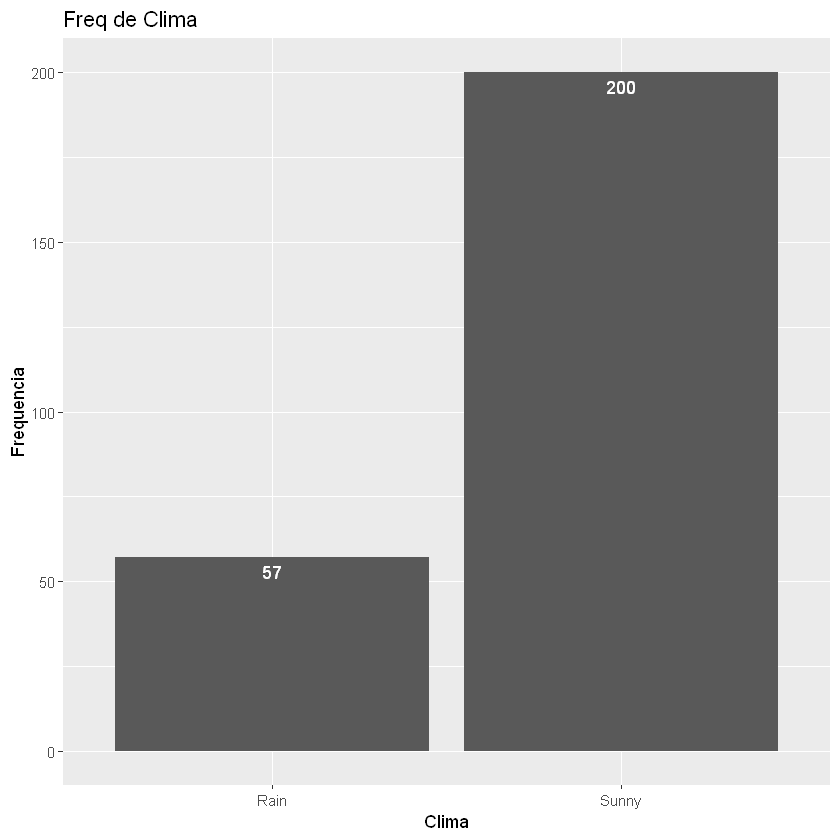

In [20]:
ggplot(data=data, aes(x=weather))+geom_bar()+
xlab("Clima")+
ylab("Frequencia")+
ggtitle("Freq de Clima")+
geom_text(aes(label = ..count..), stat = "count", vjust = 1.5, colour = "white")

[1]  7961  9371  9163  8300  8270 15735  7719 11110

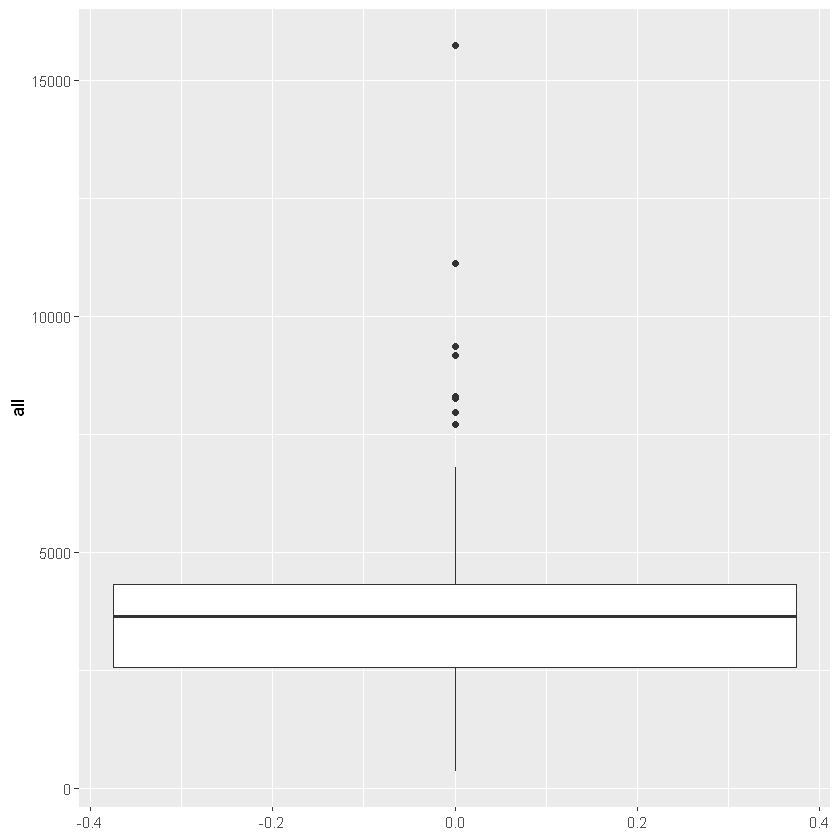

In [22]:
outliers <- boxplot.stats(data$all)$out
ggplot(data=data, aes(y=all))+geom_boxplot()
outliers

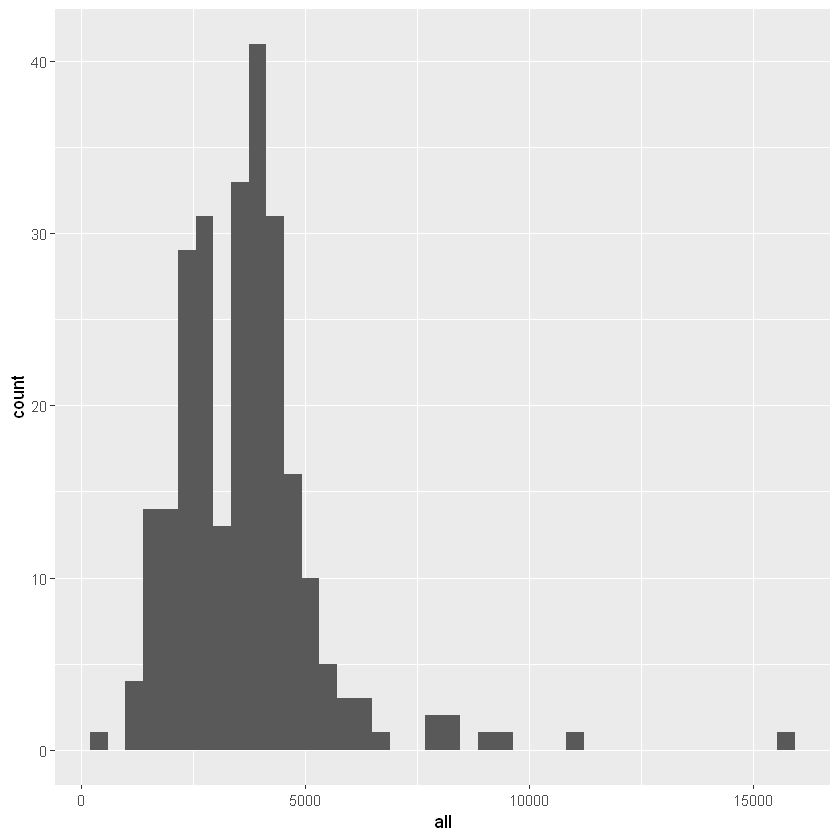

In [7]:
ggplot(data=data, aes(x=all))+geom_histogram(bins=40)

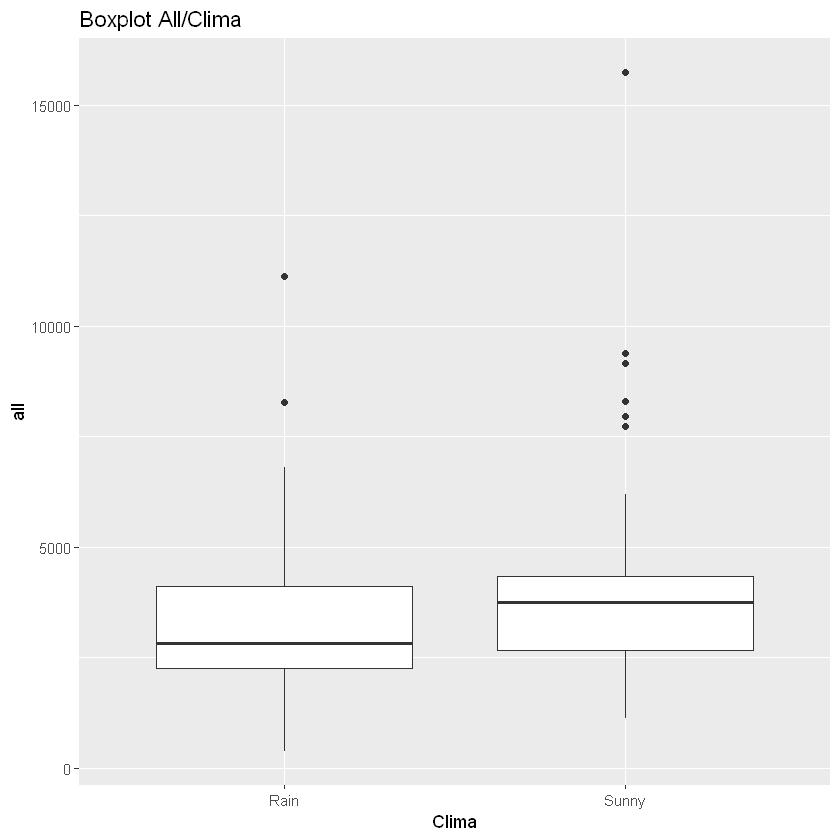

In [14]:
ggplot(data=data, aes(weather,y=all))+geom_boxplot()+xlab("Clima")+ggtitle("Boxplot All/Clima")

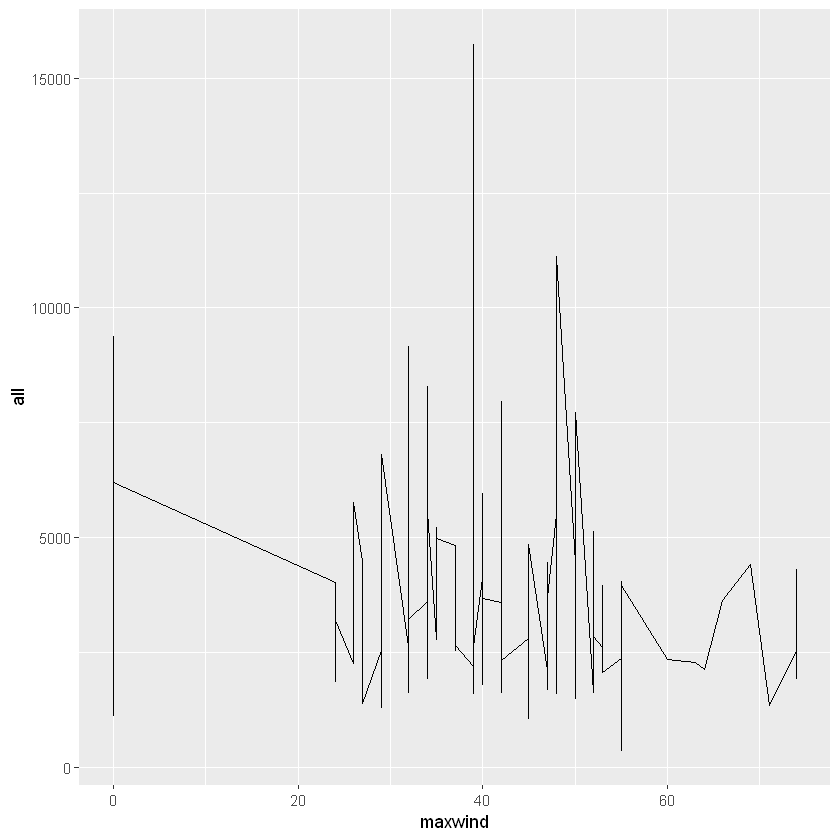

In [140]:
ggplot(data=data, aes(x=maxwind,y=all))+geom_line()

In [9]:
cor(data[2:6]) -> cor_pessoas

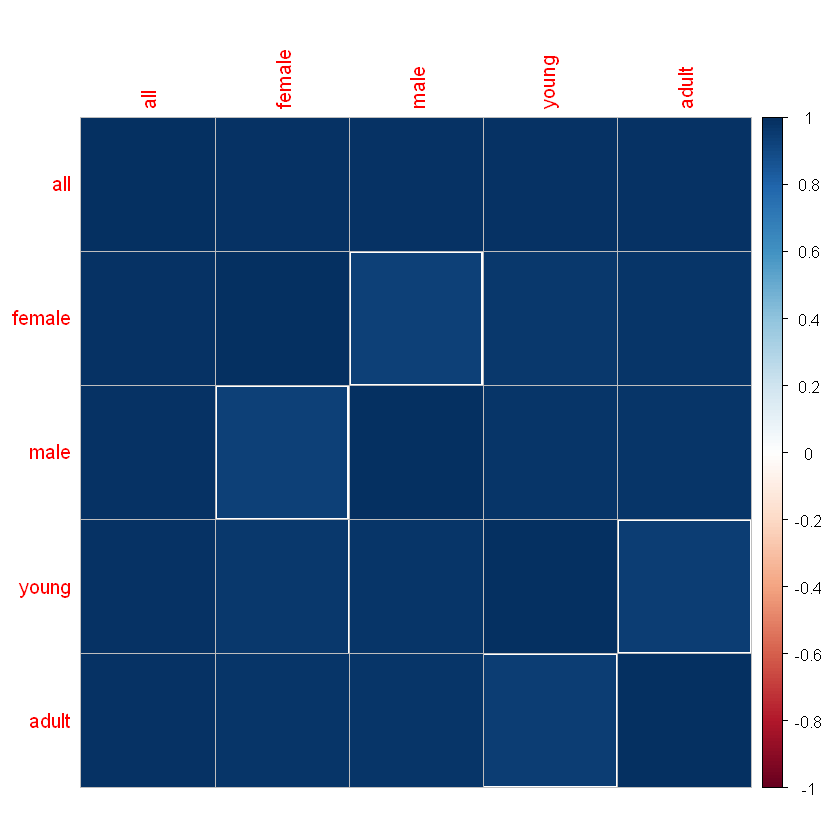

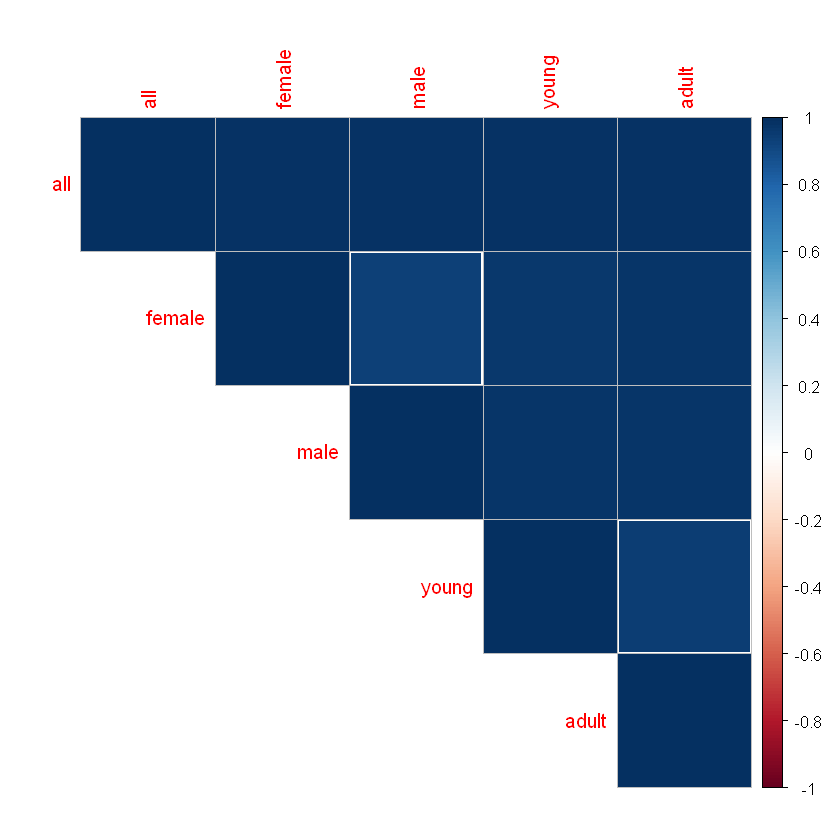

In [10]:
corrplot(cor_pessoas, method= 'square')
corrplot(cor_pessoas, method= 'square', type='upper')

[1]  7961  9371  9163  8300  8270 15735  7719 11110

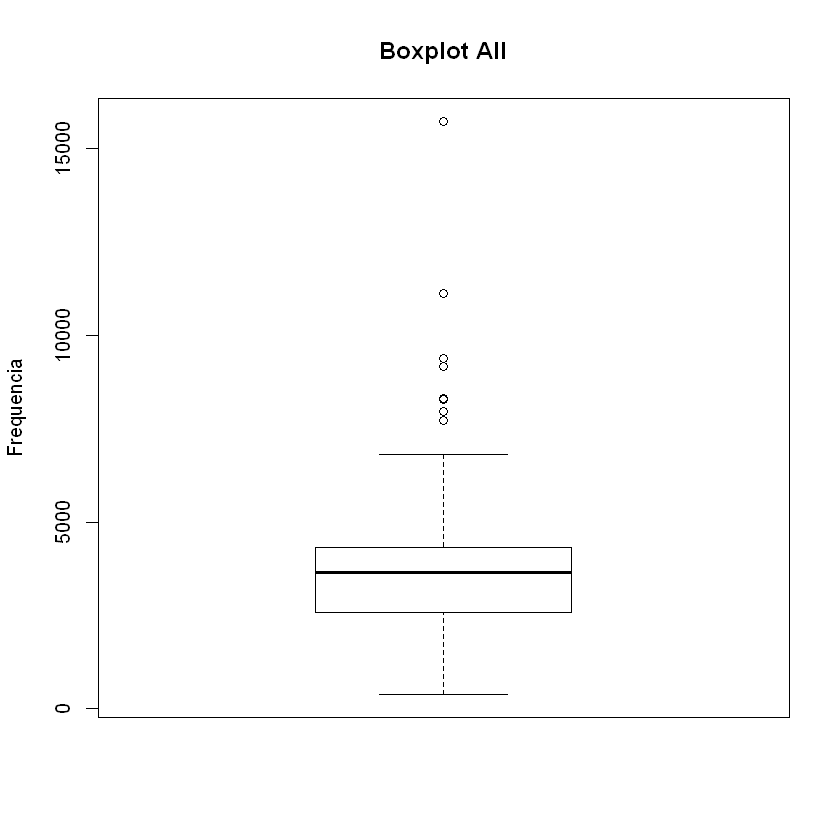

In [4]:
boxplot(data$all, main="Boxplot All", ylab="Frequencia")$out

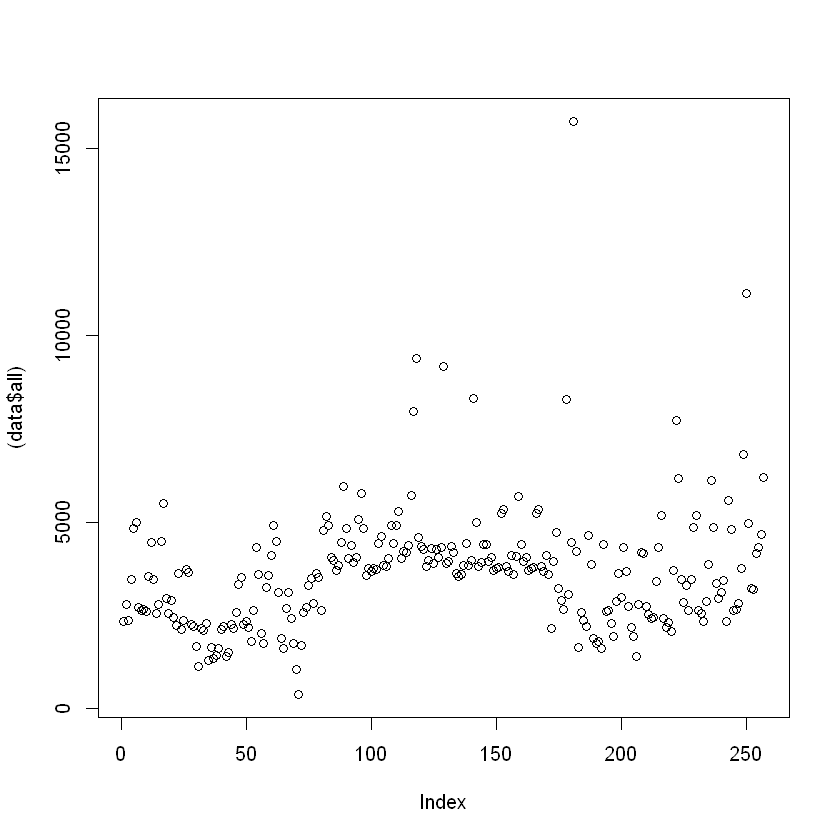

In [85]:
plot((data$all))

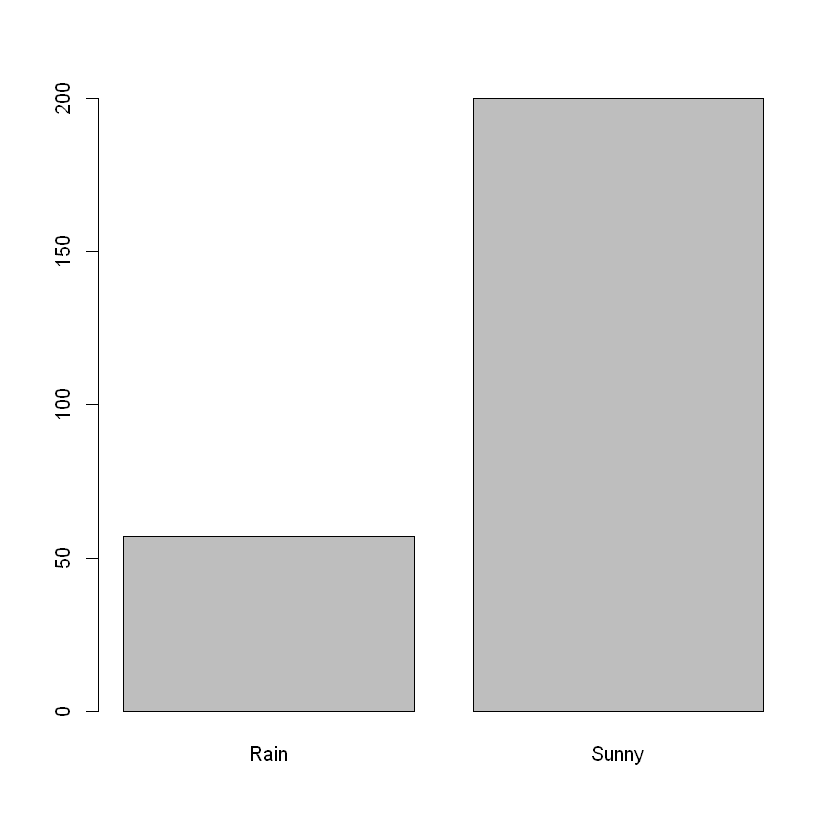

In [65]:
plot(data$weather)

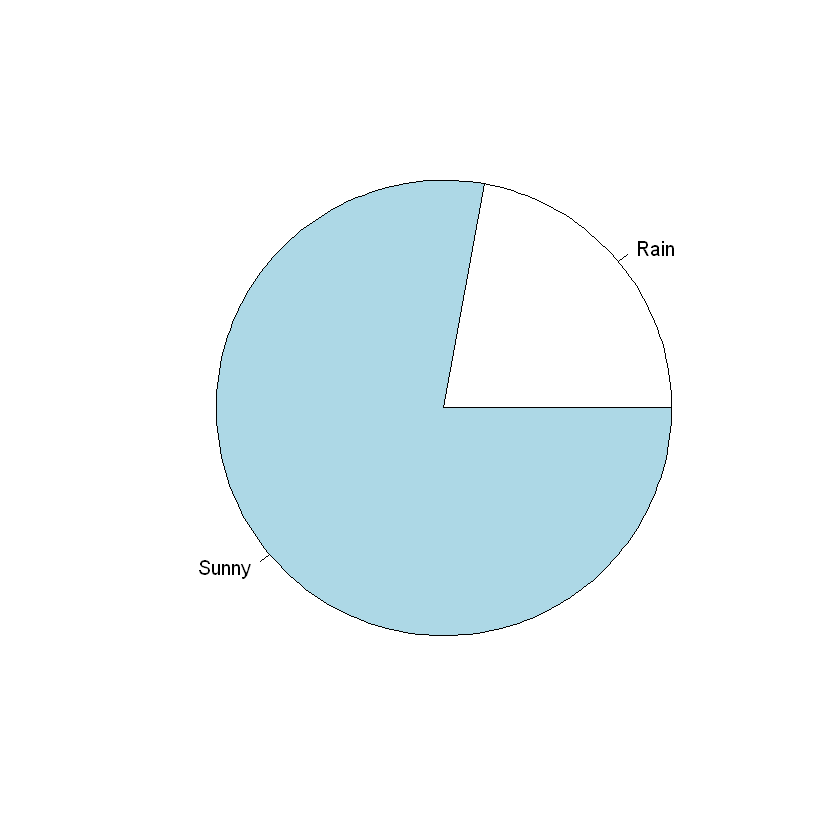

In [76]:
pie(table(data$weather))

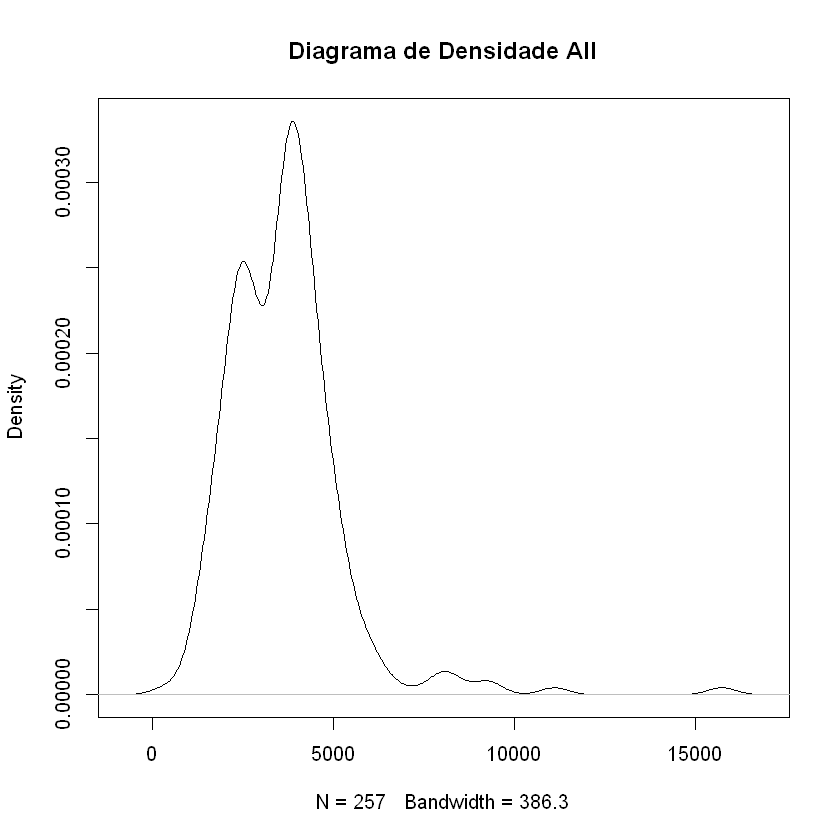

In [107]:
plot(density(data$all),main="Diagrama de Densidade All")

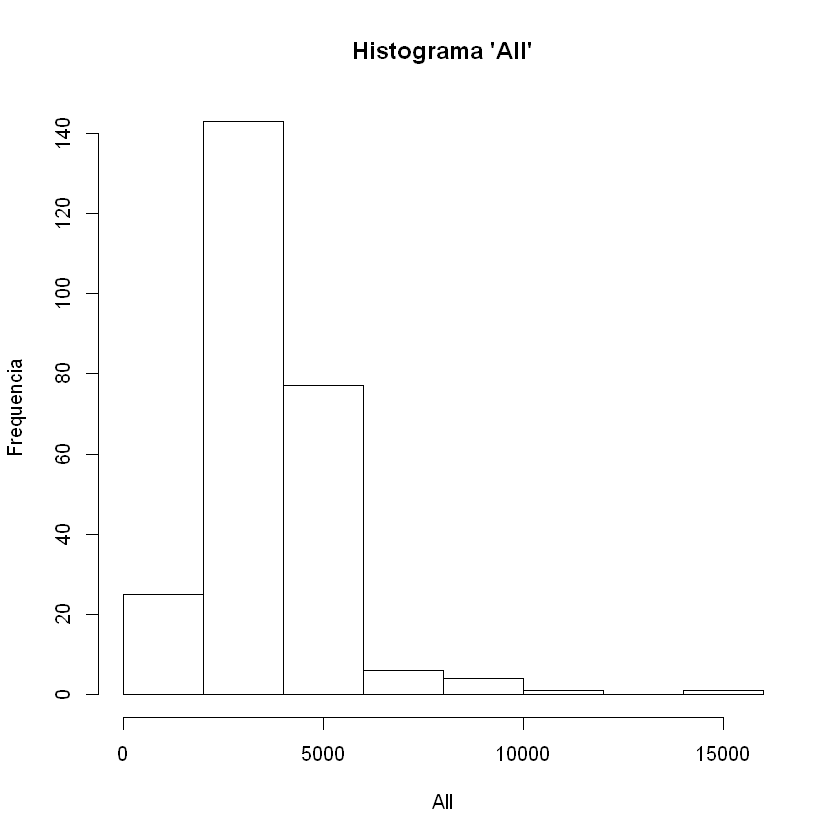

In [97]:
hist(data$all, main="Histograma 'All'", xlab="All", ylab="Frequencia")

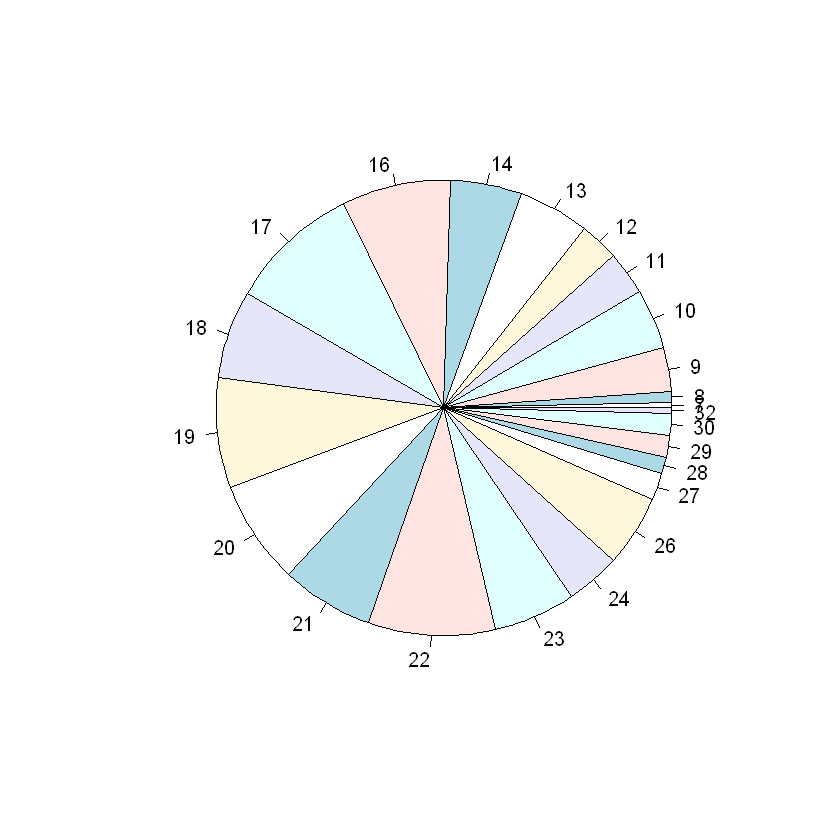

In [5]:
pie(table(data$maxtemp))

In [3]:
# ver que obsercações correspondem aos valores de 7961 9371 9163 8300 8270 15735 7719 11110
data[data$all %in% c(7961, 9371, 9163, 8300, 8270, 15735, 7719, 11110),]

,date,all,female,male,young,adult,weather,maxtemp,RH,maxwind
117,2013-08-03,7961,3693,3761,3496,4465,Sunny,21,68,42
118,2013-08-04,9371,4314,4448,4131,5240,Sunny,22,66,0
129,2013-08-15,9163,4189,4455,4005,5158,Sunny,26,70,32
141,2013-08-27,8300,3842,3850,3503,4797,Sunny,23,66,34
178,2013-10-03,8270,3715,4142,3766,4504,Rain,20,84,0
181,2013-10-06,15735,7645,7045,7495,8240,Sunny,21,68,39
222,2013-11-16,7719,3549,3768,3889,3830,Sunny,10,63,50
250,2013-12-14,11110,5246,5259,5953,5157,Rain,13,83,48


## Data Transformation

In [52]:
# Remover a date do dataframe
data <- data %>%
  select(-date)

# Substituir a variavel categórica weather por 0=RAIN e 1=SUNNY 
data$weather <- ifelse(data$weather=="Rain", 0, 1)

# Tratar outliers

# Ver como ficou o dataframe
head(data)

all,female,male,young,adult,weather,maxtemp,RH,maxwind
2332,1115,1108,1122,1210,0,13,87,0
2801,1217,1459,1239,1562,0,14,94,45
2375,1168,1099,1059,1316,0,14,82,55
3447,1617,1651,1606,1841,1,13,78,0
4823,2469,2117,2318,2505,0,16,81,37
4978,2564,2223,2289,2689,0,16,73,0


## Modeling

### Splitting the dataset

### Linear Regression

(Intercept)        female          male         young         adult 
 5.190773e-13 -9.495427e-16 -5.345465e-16  1.000000e+00  1.000000e+00 
      weather       maxtemp            RH       maxwind 
-1.123247e-13 -2.471695e-15  2.302445e-15  3.459688e-16

Warning message in summary.lm(lr):
"essentially perfect fit: summary may be unreliable"


Call:
lm(formula = all ~ ., data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-6.553e-13 -1.079e-13 -2.780e-14  2.680e-14  5.637e-12 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  5.191e-13  2.555e-13  2.031e+00   0.0433 *  
female      -9.495e-16  5.370e-16 -1.768e+00   0.0783 .  
male        -5.345e-16  6.189e-16 -8.640e-01   0.3886    
young        1.000e+00  5.270e-16  1.898e+15   <2e-16 ***
adult        1.000e+00  5.634e-16  1.775e+15   <2e-16 ***
weather     -1.123e-13  7.589e-14 -1.480e+00   0.1401    
maxtemp     -2.472e-15  6.933e-15 -3.570e-01   0.7218    
RH           2.302e-15  2.244e-15  1.026e+00   0.3059    
maxwind      3.460e-16  1.251e-15  2.760e-01   0.7824    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.305e-13 on 248 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 4.562e+32 on 8 and 248 DF,  p-value: < 2.

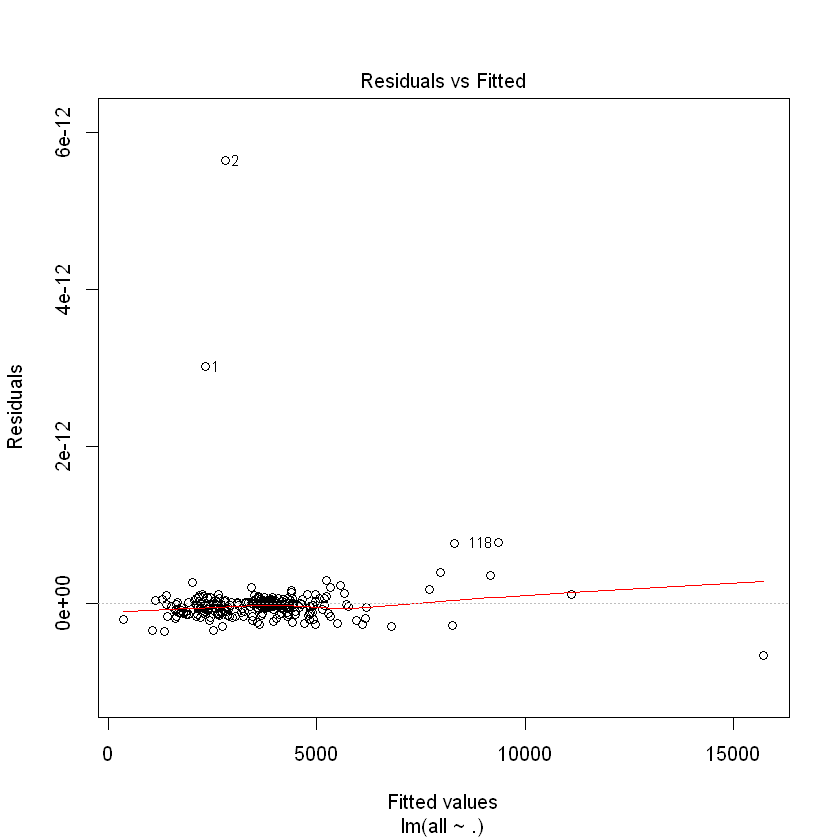

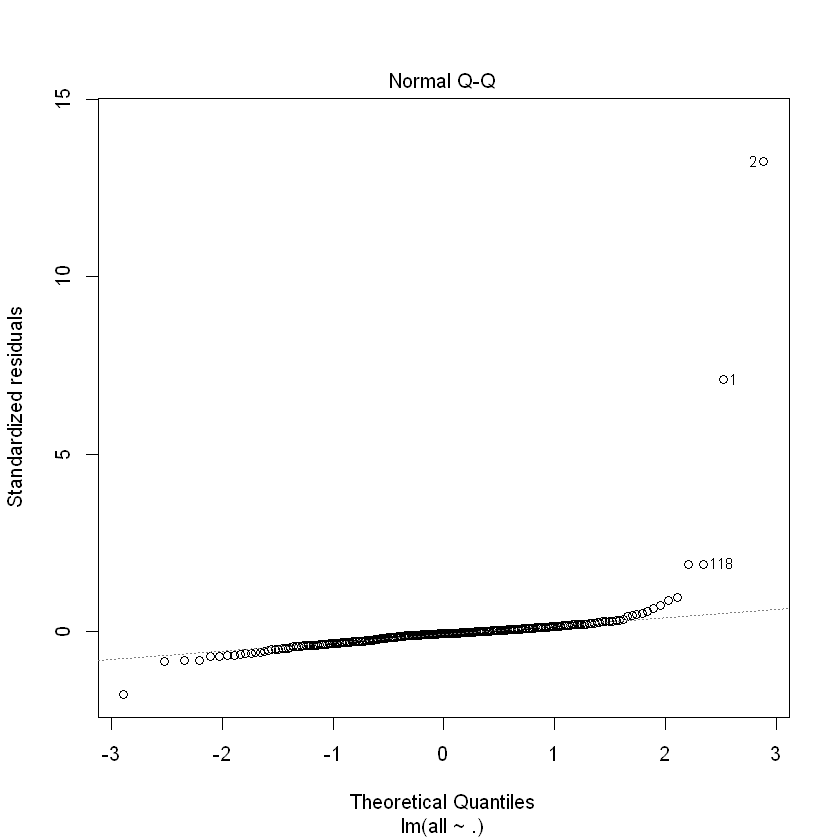

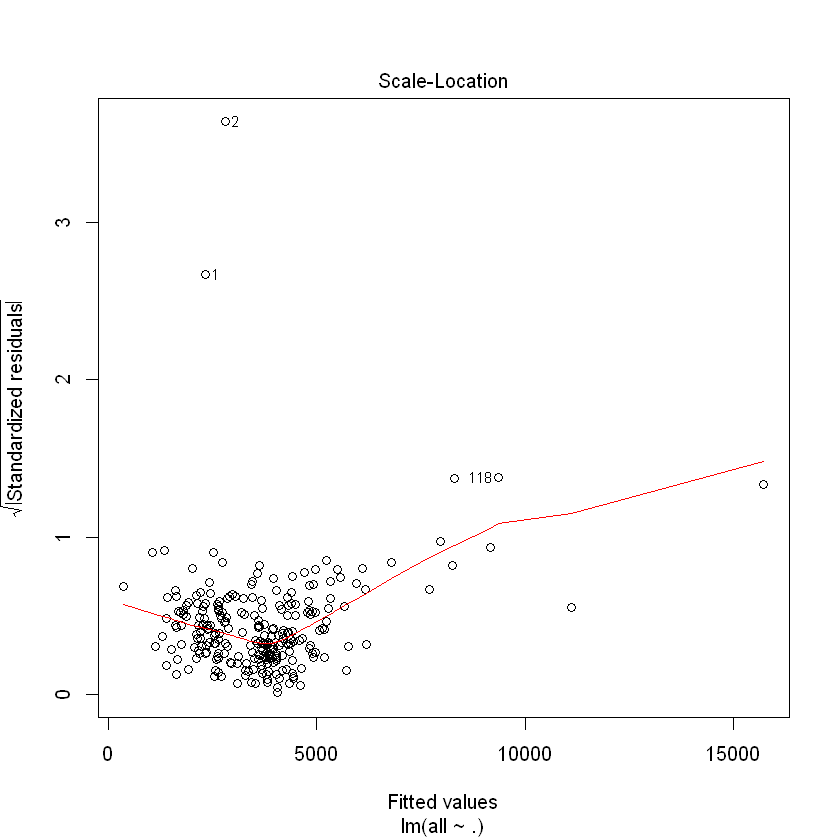

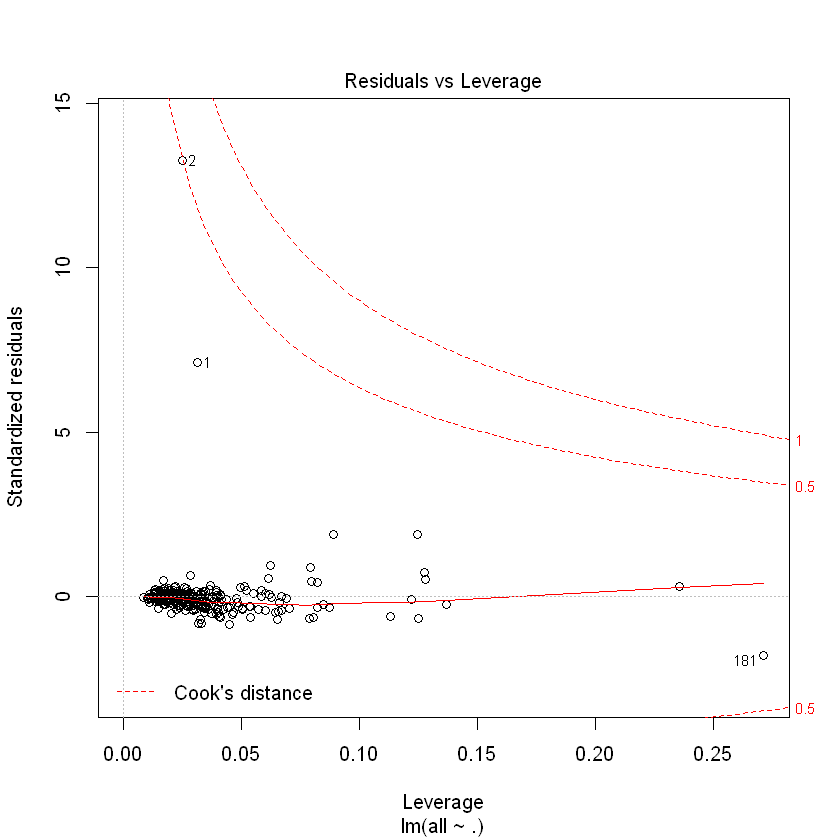

In [63]:
lr = lm(all ~ .,data = data)
lm_coeff = lr$coefficients
lm_coeff
summary(lr)
plot(lr)

## Modeling (Rminer)

### Multiple Linear Regression

In [129]:
H=holdout(data$all,ratio=7,mode="order")
H

$tr
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
[181] 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
[199] 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
[217] 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
[235] 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250

$itr
NULL

$val
NULL

$ts
[1] 251 252 253 254 255 256 257

Target Values:

[1] 4974 3228 3191 4153 4307 4660 6193

Predictions:

[1] 4893.292 3329.248 3306.918 4179.394 4312.734 4677.829 5880.371

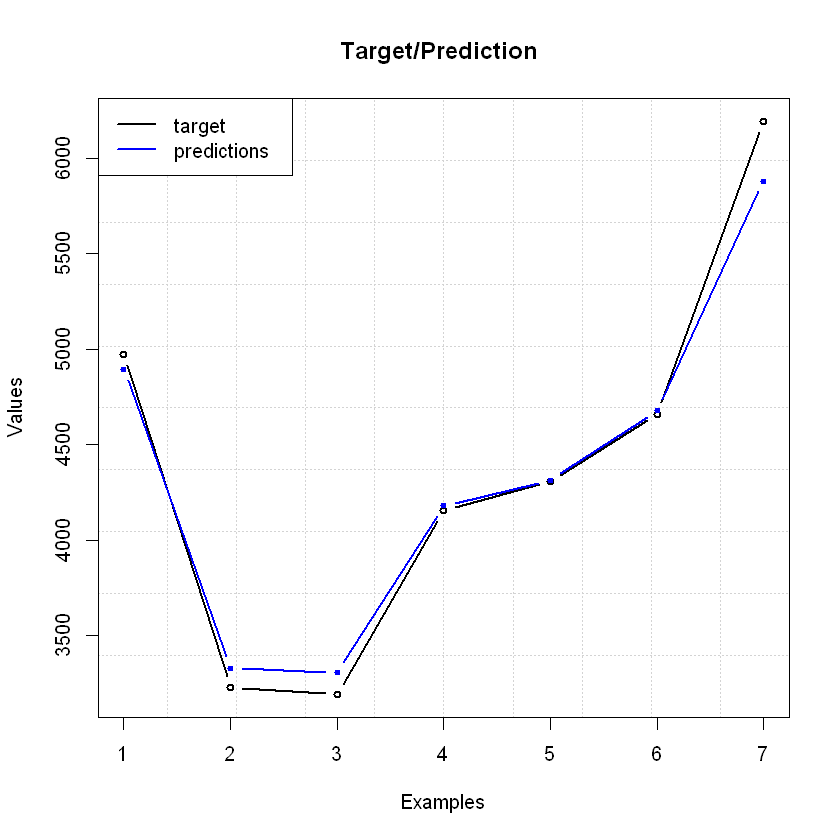

In [138]:
MR=fit(all~.,data[H$tr,],model="randomForest")
Target = data[H$ts,1]
cat("Target Values:")
Target

Pred = predict(MR,data[H$ts,])
cat("Predictions:")
Pred


mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main="Target/Prediction ")

## Time Series Forecast

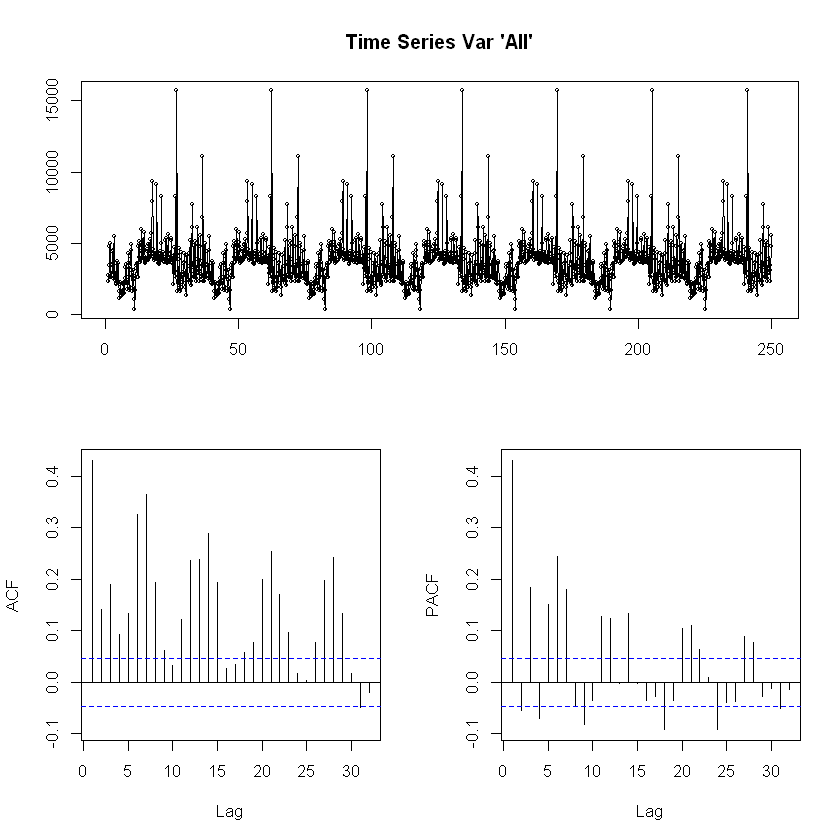

In [141]:
# Variáveis Globais
H = 7
L = length(data$all) # 257
LTR = L-H # 250 (dados de teste)
TR = ts(data$all[1:LTR],frequency=7, start=1, end=L-H) # frequencia=7 porque é diário
Target=data$all[(L-H+1):L]

tsdisplay(TR, main="Time Series Var 'All'")

### Holt Winters Method

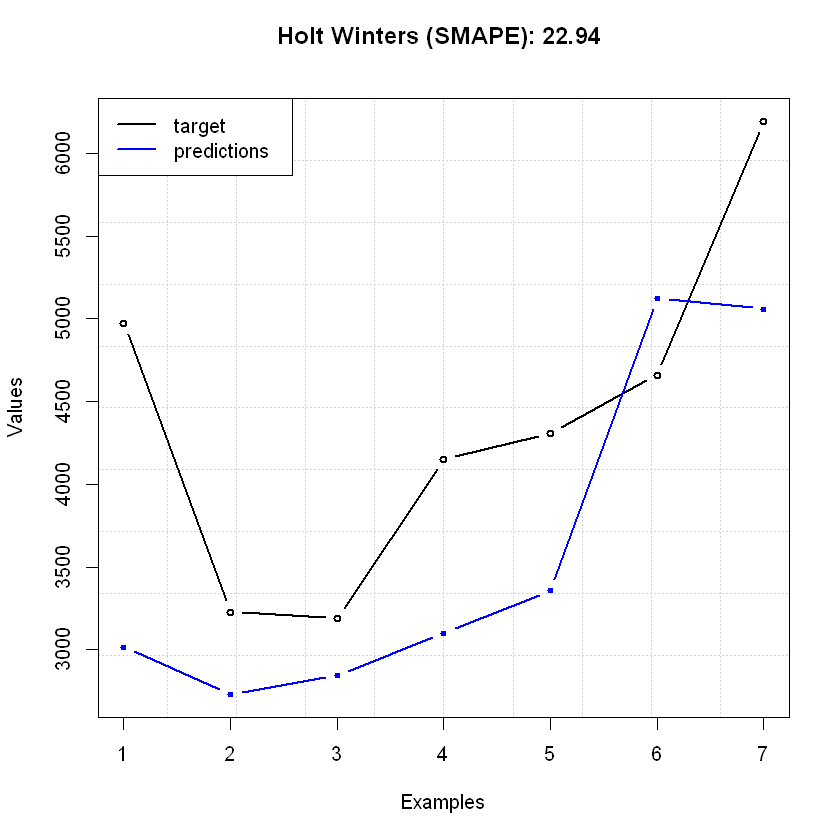

In [41]:
# Modelo
HW=HoltWinters(TR)
F=forecast(HW,h=H) # 1 to H ahead forecasts
Pred=F$mean[1:H] # HW predictions

# Gráfico
txt=paste("Holt Winters (SMAPE):",round(mmetric(Target,Pred,metric="SMAPE"),2),"\n")
mgraph(Target,Pred,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main=txt)

### ARIMA Method

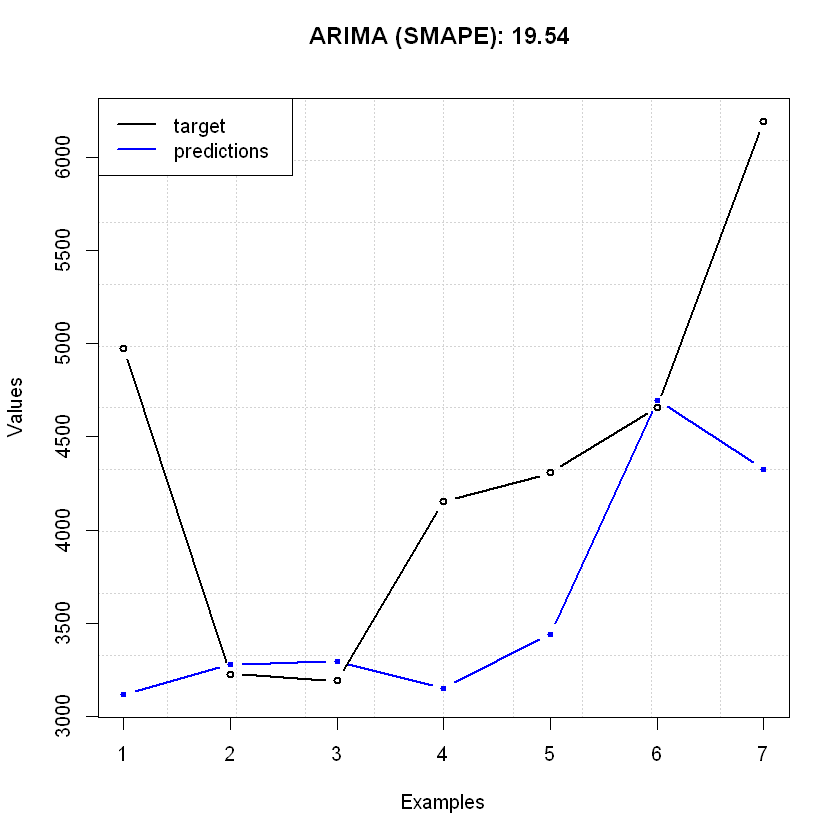

In [42]:
# Modelo
AR=auto.arima(TR)
F1=forecast(AR,h=H) # 1 to H ahead forecasts
Pred1=F1$mean[1:H] # AR predictions

#Gráfico
txt=paste("ARIMA (SMAPE):",round(mmetric(Target,Pred1,metric="SMAPE"),2),"\n")
mgraph(Target,Pred1,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main=txt)

### Neural Network Modeling

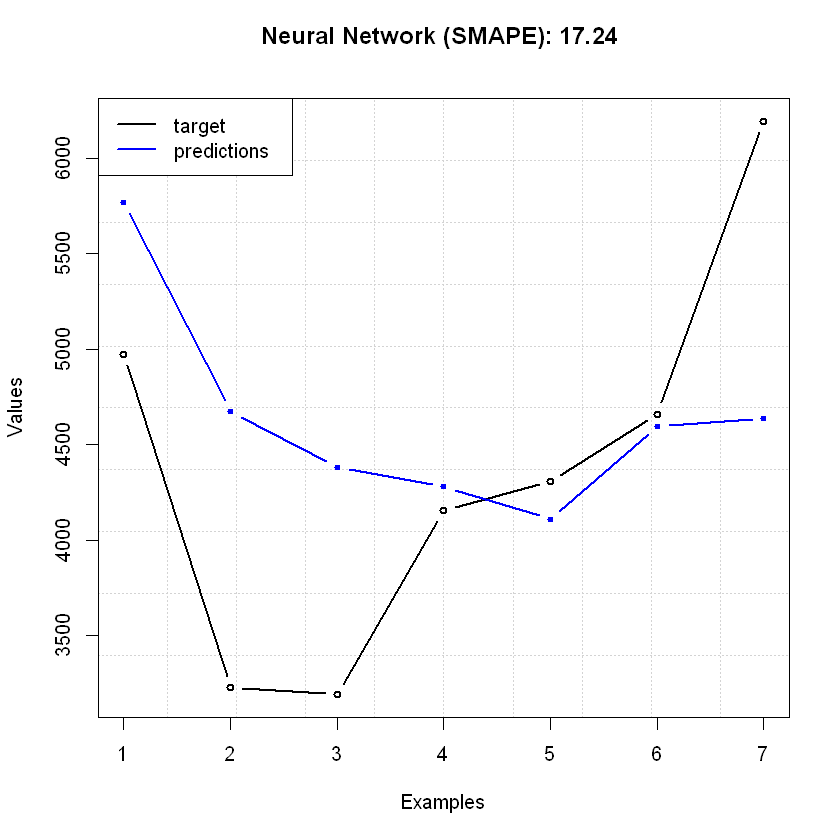

In [43]:
# neural network modeling:
d=CasesSeries(data$all,c(1,12,13)) # data.frame from time series
LD=nrow(d)
dtr=1:(LD-H) # train indices
NN=fit(y∼.,d[dtr,],model="mlpe")
# from 1 to H ahead forecasts:
Pred2=lforecast(NN,d,start=(LD-H+1),horizon=H)

# Gráfico
txt=paste("Neural Network (SMAPE):",round(mmetric(Target,Pred2,metric="SMAPE"),2),"\n")
mgraph(Target,Pred2,graph="REG",Grid=10,col=c("black","blue"),
leg=list(pos="topleft",leg=c("target","predictions")),main=txt)

In [35]:
cat(AirPassengers)

112 118 132 129 121 135 148 148 136 119 104 118 115 126 141 135 125 149 170 170 158 133 114 140 145 150 178 163 172 178 199 199 184 162 146 166 171 180 193 181 183 218 230 242 209 191 172 194 196 196 236 235 229 243 264 272 237 211 180 201 204 188 235 227 234 264 302 293 259 229 203 229 242 233 267 269 270 315 364 347 312 274 237 278 284 277 317 313 318 374 413 405 355 306 271 306 315 301 356 348 355 422 465 467 404 347 305 336 340 318 362 348 363 435 491 505 404 359 310 337 360 342 406 396 420 472 548 559 463 407 362 405 417 391 419 461 472 535 622 606 508 461 390 432

In [54]:
?mgraph

In [57]:
?mmetric

In [58]:
?predict

In [101]:
?fit